In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd /content/drive/MyDrive/MMP/Projects/KNN

/content/drive/MyDrive/MMP/Projects/KNN


In [5]:
import cross_validation
import distances
import nearest_neighbors

In [6]:
import numpy as np
import sklearn.datasets
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, multilabel_confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

In [7]:
import pandas as pd
mnist = pd.read_csv("/content/drive/MyDrive/MMP/Datasets/mnist_784.csv")
mnist.shape

(70000, 785)

In [8]:
target = np.array(mnist['class'].astype(int)[:60000])
target_test = np.array(mnist['class'].astype(int)[60000:])
mnist = mnist.drop(['class'], axis='columns')
data = mnist.iloc[:60000, :].to_numpy()
data_test = mnist.iloc[60000:, :].to_numpy()
print('train shape: ', data.shape, target.shape)
print('test shape: ', data_test.shape, target_test.shape)
del mnist

train shape:  (60000, 784) (60000,)
test shape:  (10000, 784) (10000,)


# Task 1

In [7]:
import random
import time
idx = list(np.arange(data.shape[1]))
idx10 = random.sample(idx, 10)
idx20 = random.sample(idx, 20)
idx100 = random.sample(idx, 100)
params = {
    'metric': 'euclidean',
    'test_block_size': 100,
    'k': 5,
}

In [8]:
for i in (idx10, idx20, idx100):
    print(f'{len(i)} features are used: ')
    for strategy in ('my_own', 'brute', 'kd_tree', 'ball_tree'):
        params['strategy'] = strategy
        start = time.time()
        clf1 = nearest_neighbors.KNNClassifier(**params)
        clf1.fit(data[:, i], target)
        clf1.find_kneighbors(data_test[:, i], True)
        end = time.time()
        print('\t', strategy, ', time is:', end - start)

10 features are used: 
	 my_own , time is: 61.547545194625854
	 brute , time is: 8.57012391090393
	 kd_tree , time is: 3.9650275707244873
	 ball_tree , time is: 6.569613695144653
20 features are used: 
	 my_own , time is: 69.5153534412384
	 brute , time is: 8.031169176101685
	 kd_tree , time is: 7.108087062835693
	 ball_tree , time is: 23.383166074752808
100 features are used: 
	 my_own , time is: 209.11522269248962
	 brute , time is: 10.281789064407349
	 kd_tree , time is: 129.33909273147583
	 ball_tree , time is: 119.29954695701599


# Task 2

In [14]:
params = {
    'metric': 'euclidean',
    'strategy': 'brute',
}
k_axis = np.arange(1, 11)
scores = cross_validation.knn_cross_val_score(
                        X=data,
                        y=target,
                        k_list=[i for i in range(1, 11)], 
                        score='accuracy',
                        cv=None,
                        **params)
array1 = np.array([s.mean() for s in scores.values()])

params['metric'] = 'cosine'
scores = cross_validation.knn_cross_val_score(
                        X=data,
                        y=target,
                        k_list=[i for i in range(1, 11)], 
                        score='accuracy',
                        cv=None,
                        **params)
array2 = np.array([s.mean() for s in scores.values()])

In [29]:
%config InlineBackend.figure_formats = ['svg']
sns.set_theme(style="darkgrid")

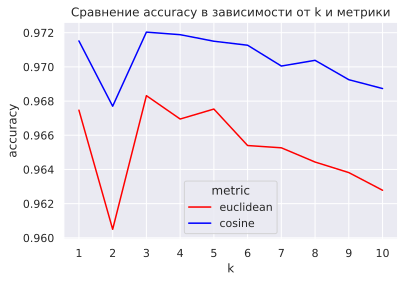

In [42]:
g = sns.lineplot(x=k_axis, y=array1, color='red', label='euclidean')
sns.lineplot(x=k_axis, y=array2, color='blue', label='cosine')
plt.title('accuracy в зависимости от k и метрики')
plt.xlabel('k')
plt.ylabel('accuracy')
g.set_xticks(k_axis)
plt.legend(title='metric')
plt.savefig('task2.pdf')
plt.show()

In [ ]:
params = {
    'metric': 'euclidean',
    'strategy': 'brute',
}
array1 = []
for k in range(1, 11):
    print(f'{k} neighbours are used', end='')
    start = time.time()
    clf1 = nearest_neighbors.KNNClassifier(**params)
    clf1.fit(data, target)
    clf1.find_kneighbors(data_test, True)
    end = time.time()
    array1.append(end - start)
    print(', time is:', end - start)

array2 = []
params['metric'] = 'cosine'
for k in range(1, 11):
    print(f'{k} neighbours are used', end='')
    start = time.time()
    clf1 = nearest_neighbors.KNNClassifier(**params)
    clf1.fit(data, target)
    clf1.find_kneighbors(data_test, True)
    end = time.time()
    array2.append(end - start)
    print(', time is:', end - start)

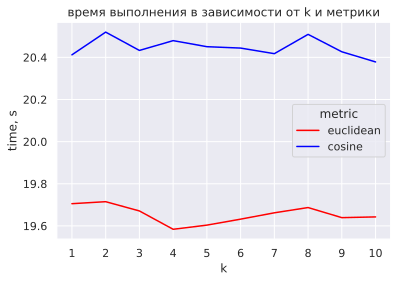

In [141]:
g = sns.lineplot(x=k_axis, y=array1, color='red', label='euclidean')
sns.lineplot(x=k_axis, y=array2, color='blue', label='cosine')
plt.title('время выполнения в зависимости от k и метрики')
plt.xlabel('k')
plt.ylabel('time, s')
g.set_xticks(k_axis)
plt.legend(title='metric')
plt.savefig('task22.pdf')
plt.show()

# Task 3

In [142]:
params = {
    'metric': 'cosine',
    'strategy': 'brute',
}
folds3 = cross_validation.kfold(data.shape[0], 5)
params['weights'] = True
start = time.time()
scores1 = cross_validation.knn_cross_val_score(
                    X=data,
                    y=target,
                    k_list=[3], 
                    score='accuracy', 
                    cv=folds3,
                    **params
)
end = time.time()
print("time with weights: ", start-end)
res1 = scores1[3].mean()

params['weights'] = False
start = time.time()
scores2 = cross_validation.knn_cross_val_score(
                    X=data,  # <- needs to be fixed
                    y=target,   # <- needs to be fixed
                    k_list=[3], 
                    score='accuracy', 
                    cv=folds3,
                    **params
)
end = time.time()
print("time witout weights: ", start-end)
res2 = scores2[3].mean()

time with weights:  -152.8353202342987
time witout weights:  -79.2826759815216


In [55]:
res1, res2

(0.9749000000000001, 0.9742166666666667)

# Task 4

In [23]:
params = {
    #  'k': 3,
    'metric': 'cosine',
    'strategy': 'brute',
    'weights': True
}

In [24]:
scores = cross_validation.knn_cross_val_score(
                        X=data,
                        y=target,
                        k_list=[3], 
                        score='accuracy',
                        cv=None,
                        **params)
print('best mean cv: ', scores[3].mean())

best mean cv:  0.9730666666666666


In [188]:
clf1 = nearest_neighbors.KNNClassifier(**params)
clf1.fit(data, target)
pred1 = clf1.predict(data_test)
print(cross_validation.accuracy(pred1, target_test))

0.973


In [189]:
cf_matrix = confusion_matrix(target_test, pred1, labels=np.unique(target))

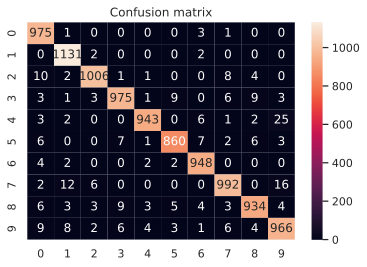

In [190]:
sns.heatmap(cf_matrix, annot=True, fmt='', )
plt.title('Confusion matrix')
plt.savefig('task41.pdf')
plt.show()

cf_matrix example: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

(array([0, 0, 0, 0, 0, 0]), array([1695, 3060, 4224, 9544, 9642, 9741]))


Text(0.5, 1.0, '9')

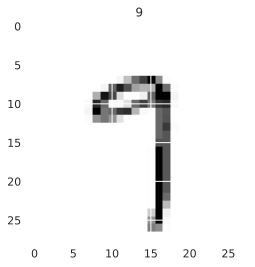

In [191]:
wrong_answers = data_test[pred1 != target_test]
wrong_targets = pred1[pred1 != target_test]
correct_targets = target_test[pred1 != target_test]

ind1 = np.where([(pred1 == 7) & (target_test == 9)])
print(ind1)
plt.imshow(data_test[4224].reshape(28, 28), cmap="Greys")
plt.title(target_test[4224])

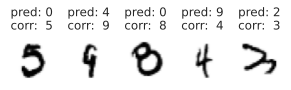

In [200]:
# plt.figure(figsize=(20, 6))
shift = 110
for i in range(1, 6):
    plt.subplot(1, 6, i)
    plt.title('pred: ' + str(int(wrong_targets[i+shift])) + '\ncorr:  ' + str(int(correct_targets[i+shift])))
    plt.axis('off')
    plt.imshow(wrong_answers[i+shift].reshape(28, 28), cmap="Greys")
plt.savefig('task42.pdf')
plt.show()

In [ ]:
scores = cross_validation.knn_cross_val_score(
                    X=data[:10000],
                    y=target[:10000], 
                    k_list=[3], 
                    score=None, 
                    cv=None,
                    **params
)
print(scores)
print(scores[3].mean())

{3: array([0.94241152, 0.94689469, 0.9279928 ])}
0.9390996688151119


Судя по https://www.kaggle.com/c/digit-recognizer/leaderboard, можно получить почти 100%-ю точность

# Task 5

In [9]:
import scipy.ndimage as ndimage
from scipy.ndimage.interpolation import shift
import skimage.filters as filters

sourse: https://towardsdatascience.com/improving-accuracy-on-mnist-using-data-augmentation-b5c38eb5a903

In [10]:
def rotate_image(image, deg):
    image = image.reshape((28, 28))
    rotated_image = ndimage.rotate(image, deg, reshape=False)
    return  rotated_image.reshape([-1])

In [11]:
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

In [75]:
def gaussan_filter(image, sigma):
    image = image.reshape((28, 28))
    shifted_image = filters.gaussian(image, sigma)
    return shifted_image.reshape([-1])

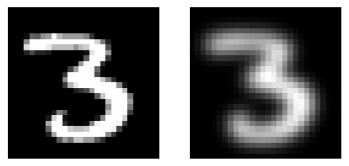

In [76]:
plt.subplot(1, 2, 1)
plt.imshow(data[12].reshape((28, 28)), cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
new_image = gaussan_filter(data[12], 1.5)
plt.imshow(new_image.reshape((28, 28)), cmap='gray')
plt.axis('off')
plt.show()

In [26]:
from tqdm.notebook import trange, tqdm
import copy

params = {
    'k': 3,
    'metric': 'cosine',
    'strategy': 'brute',
    'weights': True
}

## Подбираем параметры

In [15]:
def get_augmented_dataset(data, target, shift_list=None, rotate_list=None, sigma_list=None):
    # idx = np.random.choice(np.arange(data.shape[0]), 100)
    data_augmented = [image for image in data]
    targer_augmented = [image for image in target]
    for image, label in tqdm(zip(data, target)):
        if shift_list is not None:
            dx = np.random.choice(shift_list)
            dy = np.random.choice(shift_list)
            data_augmented.append(shift_image(image, dx, dy))
            targer_augmented.append(label)
        if rotate_list is not None:
            deg = np.random.choice(rotate_list)
            data_augmented.append(rotate_image(image, deg))
            targer_augmented.append(label)
        if sigma_list is not None:
            sigma = np.random.choice(sigma_list)
            data_augmented.append(gaussan_filter(image, sigma))
            targer_augmented.append(label)
    data_augmented = np.array(data_augmented)
    targer_augmented = np.array(targer_augmented)
    return data_augmented, targer_augmented

In [20]:
# data_augmented, targer_augmented = get_augmented_dataset(data, target, sigma_list=[1.5])
# print(data_augmented.shape, targer_augmented.shape)
# scores = cross_validation.knn_cross_val_score(
#                     X=data_augmented,
#                     y=targer_augmented, 
#                     k_list=[3], 
#                     score=None, 
#                     cv=None,
#                     **params
# )
# print("sigma 1.5, acc: ", scores[3].mean())

# data_augmented, targer_augmented = get_augmented_dataset(data, target, shift_list=[2, -2])
# print(data_augmented.shape, targer_augmented.shape)
# scores = cross_validation.knn_cross_val_score(
#                     X=data_augmented,
#                     y=targer_augmented, 
#                     k_list=[3], 
#                     score=None, 
#                     cv=None,
#                     **para1ms
# )
# print("shift 1px, acc: ", scores[3].mean())

# data_augmented, targer_augmented = get_augmented_dataset(data, target, shift_list=[-1, 1], rotate_list=[10, -10, 15, -15])
# print(data_augmented.shape, targer_augmented.shape)
# scores = cross_validation.knn_cross_val_score(
#                     X=data_augmented,
#                     y=targer_augmented, 
#                     k_list=[3], 
#                     score=None, 
#                     cv=None,
#                     **params
# )
# print("comb, acc: ", scores[3].mean())

0it [00:00, ?it/s]

(120000, 784) (120000,)
sigma 1.5, acc:  0.9790166666666668


0it [00:00, ?it/s]

(180000, 784) (180000,)
comb, acc:  0.9739222222222222


без аугментации: 0.9731
<br>
shift: <br>
- 1: 0.9651 (70000 примеров)
- 2: 0.9130 (70000 примеров)
- 3: 0.8712

rotate: <br>
- 5: 0.9788
- 10: 0.9746
- 15: 0.9703

blur:
- 0.5: 0.9786
- 1.0: 0.9774
- 1.5: 0.9683

Ultimate perfomance: rotate 5, blur 0.5/1.0

shift 1/rotate 10, acc:  0.9773000000000001

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

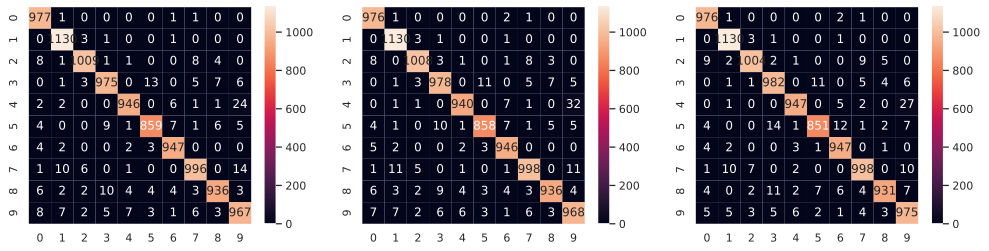

In [133]:
params = {
    'k': 3,
    'metric': 'cosine',
    'strategy': 'brute',
    'weights': True
}
# 1
plt.figure(figsize=(17, 4))
plt.subplot(1, 3, 1)
data_augmented, targer_augmented = get_augmented_dataset(data, target)
clf = nearest_neighbors.KNNClassifier(**params)
clf.fit(data_augmented, targer_augmented)
pred = clf.predict(data_test)
cf_matrix1 = confusion_matrix(target_test, pred)
sns.heatmap(cf_matrix1, annot=True, fmt='', )

# 2
plt.subplot(1, 3, 2)
data_augmented, targer_augmented = get_augmented_dataset(data, target, rotate_list=[-5, 5])
clf = nearest_neighbors.KNNClassifier(**params)
clf.fit(data_augmented, targer_augmented)
pred = clf.predict(data_test)
cf_matrix2 = confusion_matrix(target_test, pred)
sns.heatmap(cf_matrix2, annot=True, fmt='', )

# 3
plt.subplot(1, 3, 3)
data_augmented, targer_augmented = get_augmented_dataset(data, target, sigma_list=[0.5, 1.0])
clf = nearest_neighbors.KNNClassifier(**params)
clf.fit(data_augmented, targer_augmented)
pred = clf.predict(data_test)
cf_matrix3 = confusion_matrix(target_test, pred)
sns.heatmap(cf_matrix3, annot=True, fmt='', )

In [27]:
clf1 = nearest_neighbors.KNNClassifier(**params)
data_augmented, target_augmented = get_augmented_dataset(data, target, shift_list=[-1, 1], rotate_list=[15, -15], sigma_list=[1.5])
clf1.fit(data, target)
pred1 = clf1.predict(data_test)
cf_matrix1 = confusion_matrix(target_test, pred1, labels=np.unique(target))
print("without augmentation: ", cross_validation.accuracy(pred1, target_test))

clf1 = nearest_neighbors.KNNClassifier(**params)
clf1.fit(data_augmented, target_augmented)
pred1 = clf1.predict(data_test)
cf_matrix2 = confusion_matrix(target_test, pred1, labels=np.unique(target))
print("with augmentation: ", cross_validation.accuracy(pred1, target_test))

0it [00:00, ?it/s]

without augmentation:  0.9742
with augmentation:  0.9808


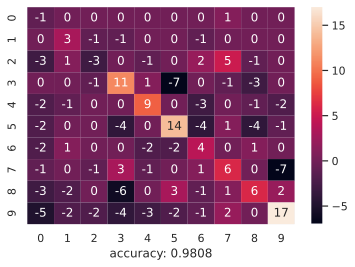

In [91]:
sns.heatmap(cf_matrix2-cf_matrix1, annot=True, fmt='', )
plt.xlabel('accuracy: 0.9808')
plt.savefig('task51.pdf')
plt.show()

# Task 6

In [42]:
data_test_augmented.shape

(40000, 784)

In [43]:
params

{'k': 3, 'metric': 'cosine', 'strategy': 'brute', 'weights': True}

In [102]:
clf1 = nearest_neighbors.KNNClassifier(**params)
clf1.fit(data, target)
pred1 = clf1.predict(data_test)

# data_test_augmented2, targer_test_augmented2 = get_augmented_dataset(data_test, target_test, shift_list=[1, -1])
# clf1 = nearest_neighbors.KNNClassifier(**params)
# clf1.fit(data, target)
# pred2 = clf1.predict(data_test_augmented2[10000:])

data_test_augmented3, targer_test_augmented3 = get_augmented_dataset(data_test, target_test, rotate_list=[5, -5])
clf1 = nearest_neighbors.KNNClassifier(**params)
clf1.fit(data, target)
pred3 = clf1.predict(data_test_augmented3[10000:])

data_test_augmented4, targer_test_augmented4 = get_augmented_dataset(data_test, target_test, sigma_list=[1.0])
clf1 = nearest_neighbors.KNNClassifier(**params)
clf1.fit(data, target)
pred4 = clf1.predict(data_test_augmented4[10000:])

data_test_augmented5, targer_test_augmented5 = get_augmented_dataset(data_test, target_test, sigma_list=[0.5])
clf1 = nearest_neighbors.KNNClassifier(**params)
clf1.fit(data, target)
pred5 = clf1.predict(data_test_augmented5[10000:])

data_test_augmented6, targer_test_augmented6 = get_augmented_dataset(data_test, target_test, rotate_list=[10, -10])
clf1 = nearest_neighbors.KNNClassifier(**params)
clf1.fit(data, target)
pred6 = clf1.predict(data_test_augmented6[10000:])

data_test_augmented7, targer_test_augmented7 = get_augmented_dataset(data_test, target_test, rotate_list=[15, -15])
clf1 = nearest_neighbors.KNNClassifier(**params)
clf1.fit(data, target)
pred7 = clf1.predict(data_test_augmented7[10000:])

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [98]:
accuracy_score(pred7, target_test)

0.9458

In [105]:
sum_pred = np.zeros(pred1.shape[0])
for i in range(pred1.shape[0]):
    voices = np.array([pred1[i], pred3[i], pred4[i], pred6[i]]).astype(int)
    major = np.argmax(np.bincount(voices))
    sum_pred[i] = major
accuracy_score(sum_pred, target_test)

0.9753

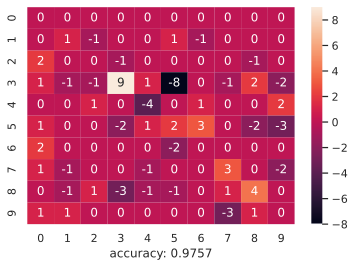

In [101]:
cf_matrix3 = confusion_matrix(target_test, sum_pred)
sns.heatmap(cf_matrix3-cf_matrix1, annot=True, fmt='')
plt.xlabel('accuracy: 0.9757')
plt.savefig('task61.pdf')
plt.show()

In [ ]:
a = np.array([1, 2, 3, 4, 5, 6, 7])
cross_validation.kfold(8, 3)

[(array([3, 4, 5, 6, 7]), array([0, 1, 2])),
 (array([0, 1, 2, 6, 7]), array([3, 4, 5])),
 (array([0, 1, 2, 3, 4, 5]), array([6, 7]))]